# Preparation

In [16]:
# Preparation: Import libraries
%matplotlib inline

import json
import random
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

In [17]:
# Preparation: Load the dataset

def load_jsonl(file_path):
    """Load a JSONL file and return a list of dictionaries."""
    with open(file_path, 'r', encoding='utf-8') as f:
        return [json.loads(line) for line in f]

# Load train, validation, and test sets
train_data = load_jsonl("data/train_en.jsonl")
val_data = load_jsonl("data/val_en.jsonl")
test_data = load_jsonl("data/test_en.jsonl")

print("Datasets loaded successfully.")

Datasets loaded successfully.


Preview the dataset

In [18]:
# Preview the loaded datasets
print(f"Train Data: {len(train_data)} sentences")
print(f"Validation Data: {len(val_data)} sentences")
print(f"Test Data: {len(test_data)} sentences")

# Preview a sample
print("\nExample from Train Data:")
print(train_data[0])

Train Data: 131280 sentences
Validation Data: 16410 sentences
Test Data: 16454 sentences

Example from Train Data:
{'tokens': ['The', 'type', 'locality', 'is', 'Kīlauea', '.'], 'ner_tags': [0, 0, 0, 0, 5, 0], 'lang': 'en'}


# Data Analasys

## Overview

In [19]:
# Dataset overview
total_tokens = sum(len(item['tokens']) for item in train_data)
print(f"Total tokens in training set: {total_tokens}")

Total tokens in training set: 2842119


## Missing Values Analysis

In [20]:
# Check missing tokens or ner_tags
missing_tokens = sum(1 for item in train_data if not item['tokens'])
missing_labels = sum(1 for item in train_data if not item['ner_tags'])

print(f"Sentences with missing tokens: {missing_tokens}")
print(f"Sentences with missing labels: {missing_labels}")

Sentences with missing tokens: 0
Sentences with missing labels: 0


## NER Tag Distribution
Analyze the frequency of each NER tag in the dataset and visualize the distribution.

NER Tag Counts:
Tag 0: 2478599
Tag 2: 66188
Tag 1: 62987
Tag 5: 58665
Tag 4: 35999
Tag 3: 27641
Tag 6: 24400
Tag 7: 12736
Tag 22: 10035
Tag 13: 8702
Tag 17: 8279
Tag 25: 7436
Tag 21: 6081
Tag 14: 5804
Tag 8: 5307
Tag 16: 4203
Tag 18: 3030
Tag 11: 2685
Tag 27: 2540
Tag 15: 2525
Tag 26: 2351
Tag 28: 1971
Tag 12: 1486
Tag 23: 569
Tag 30: 478
Tag 29: 404
Tag 19: 379
Tag 20: 363
Tag 9: 140
Tag 24: 101
Tag 10: 35
Max label frequency: 2478599
Min label frequency: 35
Max/Min ratio: 70817.11


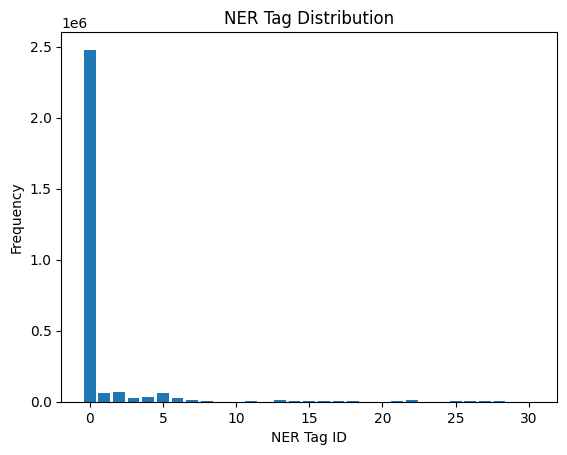

In [21]:
# Distribution of NER tags
all_labels = [tag for item in train_data for tag in item['ner_tags']]
label_counter = Counter(all_labels)

print("NER Tag Counts:")
for tag, count in sorted(label_counter.items(), key=lambda x: x[1], reverse=True):
    print(f"Tag {tag}: {count}")

max_count = max(label_counter.values())
min_count = min(label_counter.values())

print(f"Max label frequency: {max_count}")
print(f"Min label frequency: {min_count}")
print(f"Max/Min ratio: {max_count / min_count:.2f}")

# Bar plot
plt.bar(label_counter.keys(), label_counter.values())
plt.title("NER Tag Distribution")
plt.xlabel("NER Tag ID")
plt.ylabel("Frequency")
plt.show()

## Sentence Length Analysis

Average sentence length: 21.65 tokens
Max sentence length: 237 tokens
Min sentence length: 2 tokens


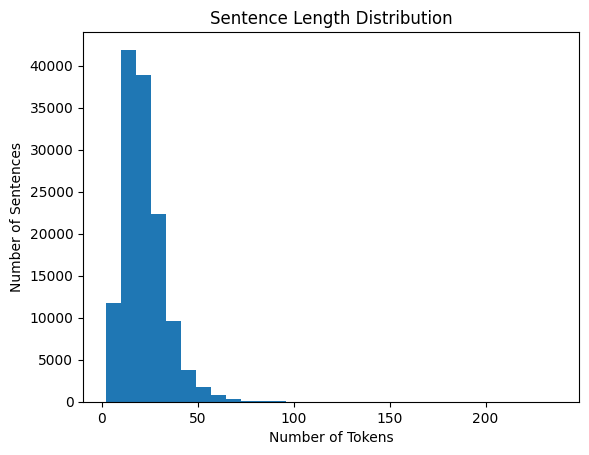

In [22]:
# Sentence length analysis
sentence_lengths = [len(item['tokens']) for item in train_data]

print(f"Average sentence length: {np.mean(sentence_lengths):.2f} tokens")
print(f"Max sentence length: {np.max(sentence_lengths)} tokens")
print(f"Min sentence length: {np.min(sentence_lengths)} tokens")

# Plot
plt.hist(sentence_lengths, bins=30)
plt.title("Sentence Length Distribution")
plt.xlabel("Number of Tokens")
plt.ylabel("Number of Sentences")
plt.show()

## Entity Span Analysis

Average entity span length: 1.80 tokens
Max entity span length: 21 tokens


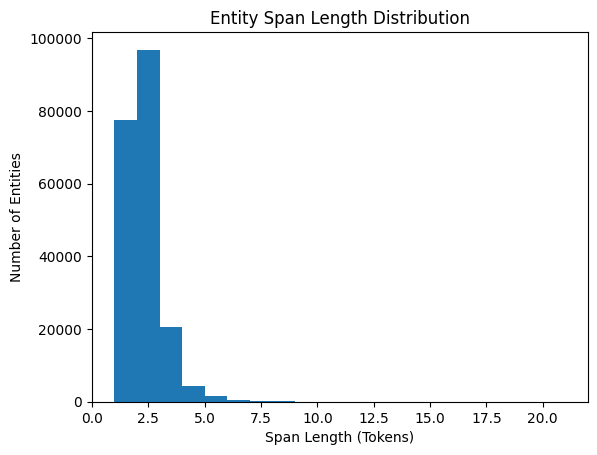

In [23]:
# Entity span analysis
span_lengths = []
for item in train_data:
    span = 0
    for tag in item['ner_tags']:
        if tag > 0:  # assuming 0 is "O" (no entity)
            span += 1
        else:
            if span > 0:
                span_lengths.append(span)
                span = 0
    if span > 0:
        span_lengths.append(span)

if span_lengths:
    print(f"Average entity span length: {np.mean(span_lengths):.2f} tokens")
    print(f"Max entity span length: {np.max(span_lengths)} tokens")

    plt.hist(span_lengths, bins=20)
    plt.title("Entity Span Length Distribution")
    plt.xlabel("Span Length (Tokens)")
    plt.ylabel("Number of Entities")
    plt.show()
else:
    print("No entity spans found.")


## Sample Sentences

In [24]:
# Show random examples
for _ in range(3):
    example = random.choice(train_data)
    print("\nTokens:", " ".join(example['tokens']))
    print("NER Tags:", example['ner_tags'])


Tokens: A win also would have put him just one victory short of Joe Louis ' all-time record for successful defenses at any weight class .
NER Tags: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Tokens: The capital Bamako is administered separately and is in its own district .
NER Tags: [0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Tokens: The earliest recorded use of the term was in 1565 , referring to a human false pregnancy .
NER Tags: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 14, 0]
